# How do people feel when tweeting #METOO, #BLM, and #MAGA?

# Accessing tweets

In [21]:
import os
import tweepy as tw
import pandas as pd

access_token = '1279128353136574465-yGKBss8obvnK0LLT3nV6viICmDwbQB'
access_secret = 'wrVAWl884P4t0PwU9JXloWRzshdhGZEnRcayoxSW8xE75'
consumer_key = 'AHZyv0lHpvS2C30F0lPtJI7Yl'
consumer_secret = 'wvkav6VaaTTn9ekE2C56jERxMITyasf5NZLPmPIsANacfgnj9u'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [22]:
new_search = "#metoo -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(20)

metoo_tweets = [tweet.text for tweet in tweets]
metoo_tweets[:5]

['Jen &amp; Colton + Brandi &amp; Matt + Zane = Non-Stop Drama ! Pop-Out Girl.  At #TatteredCover Book Stores, Denver.… https://t.co/9bxNDY6S5f',
 '“Great Read…will leave you wanting more,” Cust Revu, Pop-Out Girl.. Now at #Tattered Cover Book Store, Denver.… https://t.co/t5ljNGPrPk',
 'YOU:  Alexa, what novel should I read this weekend?    \nALEXA:  Pop-Out Girl by Irene Woodbury.\n#GreatReads… https://t.co/OAQebMjbyM',
 'Love, Loss, &amp; What I Wore While Popping Out of a Cake at Caesar’s.  #GreatReads #WomensFiction #MeToo\nhttps://t.co/HRo1HFiqkp',
 'At the end of the day it’s a love story.\n#GreatReads #ChickLit #MeToo\nhttps://t.co/HRo1HFiqkp']

In [23]:
new_search = "#blm -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(20)

blm_tweets = [tweet.text for tweet in tweets]
blm_tweets[:5]

['#SayHerName  in other words “her life didn’t matter” collateral damage like a flat tire! #BLM',
 "my only problem with #blm #antifa riots is serious lack of high def vids, cmon it's 2020...fuck is with all 360p crap",
 '@charliekirk11 The same should be applied to #BLM. @realDonaldTrump',
 'Do NOT let #biden #ACLU #BLM  destroy our country!🇺🇸. #amustreadbook #2020Election #bail.   https://t.co/bNQNuVfj3R',
 "@Cernovich That's great but #BLM needs to be included"]

In [24]:
new_search = "#maga -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(20)

maga_tweets = [tweet.text for tweet in tweets]
maga_tweets[:5]

['@TomFitton This smells like Treason! This is more than prison for lifetime!\n\nDurham is just too slow. He should ind… https://t.co/kyTWMFcjyb',
 "@StreetUrchin7 @ProudSocialist I haven't noticed a huge difference between #MAGA and #BlueMAGA. Palmer is definitely #BlueMAGA.",
 '@thehill From Legend’s lips to God’s ears. Him &amp; wife. If ever there was “Privileged” couple it’s them. Always carp… https://t.co/vaPuGMcgEZ',
 '@DonaldJTrumpJr @realDonaldTrump Trump: Having America as an enemy is not the necessity of Russia but having Russia… https://t.co/aauB59Tv7o',
 '@BlueOklahoma @DonaldJTrumpJr Trump: Having America as an enemy is not the necessity of Russia but having Russia as… https://t.co/FITBXdD3eO']

## Sentiment Analysis Using NLP

In [25]:
#!pip install afinn
from afinn import Afinn
af = Afinn()     #Instantiates an Afinn object

In [26]:
# compute sentiment scores and labels
metoo_sentiment_scores = [af.score(tweet) for tweet in metoo_tweets]
metoo_sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in metoo_sentiment_scores]


blm_sentiment_scores = [af.score(tweet) for tweet in blm_tweets]
blm_sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in blm_sentiment_scores]

maga_sentiment_scores = [af.score(tweet) for tweet in maga_tweets]
maga_sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in maga_sentiment_scores]

In [27]:
# categorize and join all tweet data
df_metoo = pd.DataFrame(metoo_tweets)
df_metoo['hashtag'] = '#metoo'
df_metoo['sentiment_score'] = metoo_sentiment_scores
df_metoo['sentiment_category'] = metoo_sentiment_category

         
df_blm = pd.DataFrame(blm_tweets)
df_blm['hashtag'] = '#blm'
df_blm['sentiment_score'] = blm_sentiment_scores
df_blm['sentiment_category'] = blm_sentiment_category
         
df_maga = pd.DataFrame(maga_tweets)
df_maga['hashtag'] = '#maga'
df_maga['sentiment_score'] = maga_sentiment_scores
df_maga['sentiment_category'] = maga_sentiment_category
         
df_all = pd.concat([df_metoo, df_blm, df_maga])
df_all.rename(columns={ df_all.columns[0]: "tweet" }, inplace = True)
df_all.head()

,tweet,hashtag,sentiment_score,sentiment_category
0,Jen &amp; Colton + Brandi &amp; Matt + Zane = ...,#metoo,-1.0,negative
1,"“Great Read…will leave you wanting more,” Cust...",#metoo,2.0,positive
2,"YOU: Alexa, what novel should I read this wee...",#metoo,2.0,positive
3,"Love, Loss, &amp; What I Wore While Popping Ou...",#metoo,0.0,neutral
4,At the end of the day it’s a love story.\n#Gre...,#metoo,3.0,positive


In [29]:
#sentiment statistics per hashtag
df = df_all
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['hashtag']).describe()

sentiment_score                                          
                  count mean       std   min  25%  50%   75%  max
hashtag                                                          
#blm               20.0 -1.5  5.394929 -13.0 -3.5  0.0  3.00  5.0
#maga              20.0 -1.1  2.552604  -9.0 -2.0  0.0  0.00  3.0
#metoo             20.0 -0.6  2.779625  -7.0 -2.0  0.0  1.25  4.0

Average sentiment is lower in blm and higher in metoo.

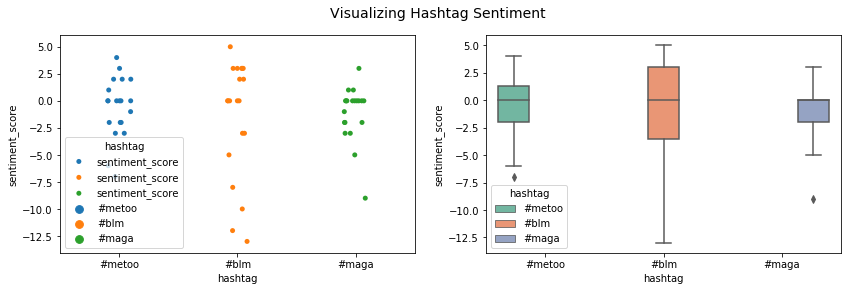

In [30]:
# spread of sentiment polarity -- much higher in blm and maga, metoo has a lot more negative polarity
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='hashtag', y="sentiment_score", 
                   hue='hashtag', data=df, ax=ax1)
bp = sns.boxplot(x='hashtag', y="sentiment_score", 
                 hue='hashtag', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Hashtag Sentiment', fontsize=14)
plt.show()

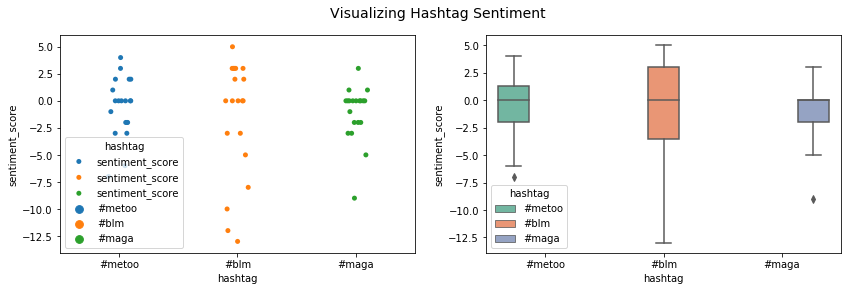

In [31]:
# frequency of sentiment labels
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='hashtag', y="sentiment_score", 
                   hue='hashtag', data=df, ax=ax1)
bp = sns.boxplot(x='hashtag', y="sentiment_score", 
                 hue='hashtag', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Hashtag Sentiment', fontsize=14)

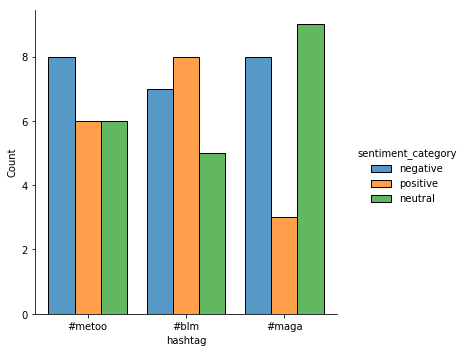

In [32]:
dp = sns.displot(x="hashtag", data=df, hue = 'sentiment_category', multiple="dodge", shrink=.8
                )

metoo has the lowest number of positive sentiments, blm has the highest
blm has the lowest number of neutral sentiments
maga has the lowest number of negative sentiments
what were the most positive and negative reviews about?

In [33]:
df[(df['hashtag'] == "#blm") & (df.sentiment_score == max(df.sentiment_score))]
#the most positive tweet was about naomi osaka.

,tweet,hashtag,sentiment_score,sentiment_category
16,It’s awesome. Safety first. It’s been a known ...,#blm,5.0,positive


In [34]:
df[(df['hashtag'] == "#blm") & (df.sentiment_score == min((df['hashtag'] == "#blm")))]

,tweet,hashtag,sentiment_score,sentiment_category
0,#SayHerName in other words “her life didn’t m...,#blm,0.0,neutral
2,@charliekirk11 The same should be applied to #...,#blm,0.0,neutral
12,@realDonaldTrump Black Lives MAGA✊🏾 \n#BLM #Bl...,#blm,0.0,neutral
13,ICYMI:\nClips from the #LofiThursday vault loc...,#blm,0.0,neutral
17,#Officer #LenaTurpin #Hamilton #Missouri #Poli...,#blm,0.0,neutral


In [35]:
df[(df['hashtag'] == "#maga") & (df.sentiment_score == min((df['hashtag'] == "#maga")))]

,tweet,hashtag,sentiment_score,sentiment_category
5,Seriously. #MAGA #BlueLivesMatterMore https://...,#maga,0.0,neutral
7,New song / 3 #music videos / #MAGA YMCA and #...,#maga,0.0,neutral
9,Do not mail in your ballot. Go to the polls i...,#maga,0.0,neutral
10,Ladies !!! \n\nIf you’ve EVER #HadSex 😍 with a...,#maga,0.0,neutral
12,BOOM!!! Trump keeps on going!!\n\n#ThankYouMrP...,#maga,0.0,neutral
14,#MAGA #MAGA2020 #MAGA2020LandslideVictory \n#M...,#maga,0.0,neutral
17,@JonSant28500211 @Susan_USA_Love @JohnRJohnson...,#maga,0.0,neutral
18,Here you go #MAGA people. https://t.co/jy2Gqj...,#maga,0.0,neutral
19,ICYMI! #WWG1GWA Q is a pig farmer in the Phil...,#maga,0.0,neutral


##  Visualization
Pie charts

In [36]:
#need to create a function to do this for each hashtag
import plotly.express as px

df_pie = df[df['hashtag'] == '#metoo']

#breaking positives, negatives, and neutrals in separate dataframes, 
#selecting sentiment scores, 
#ounting how many scores in each dataframe
#making it a type string so that it can go into px.pie

pos_num = df_pie[df_pie['sentiment_category'] == 'positive']['sentiment_score'].count().astype(str)
neg_num = df_pie[df_pie['sentiment_category'] == 'negative']['sentiment_score'].count().astype(str)
neu_num = df_pie[df_pie['sentiment_category'] == 'neutral']['sentiment_score'].count().astype(str)

scores = [pos_num, neg_num, neu_num]
print(scores)
fig = px.pie(df_pie, values=[pos_num, neg_num, neu_num], names= ['Positive', 'Negative', 'Neutral'], title='Me Too Sentimentient Categories')
fig.show()

['6', '8', '6']


In [37]:
df_pie = df[df['hashtag'] == '#blm']

pos_num = df_pie[df_pie['sentiment_category'] == 'positive']['sentiment_score'].count().astype(str)
neg_num = df_pie[df_pie['sentiment_category'] == 'negative']['sentiment_score'].count().astype(str)
neu_num = df_pie[df_pie['sentiment_category'] == 'neutral']['sentiment_score'].count().astype(str)

scores = [pos_num, neg_num, neu_num]
print(scores)
fig = px.pie(df_pie, values=[pos_num, neg_num, neu_num], names= ['Positive', 'Negative', 'Neutral'], title='BLM Sentimentient Categories')
fig.show()

['8', '7', '5']


In [38]:
df_pie = df[df['hashtag'] == '#maga']

pos_num = df_pie[df_pie['sentiment_category'] == 'positive']['sentiment_score'].count().astype(str)
neg_num = df_pie[df_pie['sentiment_category'] == 'negative']['sentiment_score'].count().astype(str)
neu_num = df_pie[df_pie['sentiment_category'] == 'neutral']['sentiment_score'].count().astype(str)

scores = [pos_num, neg_num, neu_num]
print(scores)
fig = px.pie(df_pie, values=[pos_num, neg_num, neu_num], names= ['Positive', 'Negative', 'Neutral'], title='MAGA Sentimentient Categories')
fig.show()

['3', '8', '9']


# Launching Visualization to Dash

In [39]:
import pandas as pd
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objects as go

from dash.dependencies import Input, Output

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

app.layout = html.Div([
    html.H1("Twitter Hashtag Dashboard", style={'text-align': 'center'}),
    html.Br(),
    dcc.Tabs(id='tabs', value='tab-1', 
             children=[
                dcc.Tab(label='Tab one', value='tab-1'),
                dcc.Tab(label='Tab two', value='tab-2'),
    ]),
    html.Div(id='tabs-content')
])


@app.callback(Output('tabs-content', 'children'),
        [Input('tabs', 'value')])

def render_content(tab):
    
    if tab == 'tab-1':
        return html.Div([
            html.H3('#metoo'),
                dcc.Graph(figure={
                                'data': [
                                    go.Pie(
                                        labels=['Positives', 'Negatives', 'Neutrals'], 
                                        values=[pos_num_metoo, neg_num_metoo, neu_num_metoo],
                                        name="View Metrics",
                                        marker_colors=['rgba(184, 247, 212, 0.6)','rgba(255, 50, 50, 0.6)','rgba(131, 90, 241, 0.6)'],
                                        textinfo='value',
                                        hole=.65)
                                ]

                            }),
            html.H3('#blm'),
                dcc.Graph(figure={
                                'data': [
                                    go.Pie(
                                        labels=['Positives', 'Negatives', 'Neutrals'], 
                                        values=[pos_num_blm, neg_num_blm, neu_num_blm],
                                        name="View Metrics",
                                        marker_colors=['rgba(184, 247, 212, 0.6)','rgba(255, 50, 50, 0.6)','rgba(131, 90, 241, 0.6)'],
                                        textinfo='value',
                                        hole=.65)
                                ]

                            }),
            html.H3('#maga'),
                dcc.Graph(figure={
                                'data': [
                                    go.Pie(
                                        labels=['Positives', 'Negatives', 'Neutrals'], 
                                        values=[pos_num_maga, neg_num_maga, neu_num_maga],
                                        name="View Metrics",
                                        marker_colors=['rgba(184, 247, 212, 0.6)','rgba(255, 50, 50, 0.6)','rgba(131, 90, 241, 0.6)'],
                                        textinfo='value',
                                        hole=.65)
                                ]

                            })
        
        ])
    
    
    elif tab == 'tab-2':
        return html.Div([
            html.H3('Sentiment Scores'),
        dcc.Graph(
                figure={
                    'data': [
                        {'x': ['metoo', 'blm', 'maga'], 'y': [neu_num_metoo, neu_num_blm, neu_num_maga],
                            'type': 'bar', 'name': 'Neutral'},
                        {'x': ['metoo', 'blm', 'maga'], 'y': [pos_num_metoo, pos_num_blm, pos_num_maga],
                         'type': 'bar', 'name': 'Positive'},
                        {'x': ['metoo', 'blm', 'maga'], 'y': [neg_num_metoo, neg_num_blm, neg_num_maga],
                         'type': 'bar', 'name': 'Negative'}
                    ]
                }
            )
        ])


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 48] Address already in use